In [1]:
import os
from TrainedEmulator import *

emulator_dir = "/Users/gabe/projects/emulators/models"
emulator_name = "modrec_new_18"

em = TrainedEmulator(os.path.join(emulator_dir, "modrec_extended_34"))

2024-06-26 13:32:40.420862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#get the input variables
print(em.output_info["input_names"])

#get list of products the emulator can compute
print(em.available_products)

#get grid of ell values that the emulator is trained to produce
print(em.ell)

#get which quantities are saved on a grid of redshifts
print(em.output_info["output_z_grids"].keys())

#get redshift grid for quantities
print(em.output_info["output_z_grids"]["x_e"])

['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'ln10^{10}A_s', 'H0', 'qt_1', 'qt_2', 'qt_3', 'qt_4', 'qt_5', 'qt_6', 'qt_7']
['tt', 'te', 'ee', 'pp', 'H', 'angular_distance', 'sigma8_z', 'x_e', 'g', 'Omega_Lambda', 'sigma8', 'YHe', 'z_d', 'rs_d', 'z_rec', 'tau_rec', 'ra_rec', 'z_reio', 'z_star', 'tau_star', 'rs_star', 'rd_star', 'da_star', '100*theta_star']
[   2    3    4    5    6    7    8    9   10   11   12   13   14   15
   16   17   19   21   23   25   27   30   33   36   40   44   49   54
   60   67   75   83   92  103  115  128  143  160  179  200  223  249
  278  311  348  387  426  465  504  543  582  621  660  699  738  777
  816  855  894  933  972 1011 1050 1089 1128 1167 1206 1245 1284 1323
 1362 1401 1440 1479 1518 1557 1596 1635 1674 1713 1752 1791 1830 1869
 1908 1947 1986 2025 2064 2103 2142 2181 2220 2259 2298 2337 2376 2415
 2454 2493 2532 2571 2610 2649 2688 2727 2766 2805 2844 2883 2922 2961
 3000 3039 3078 3117 3156 3195 3234 3273 3312 3351 3390 3429 3468 3507
 354

In [9]:
# best fit parameters to Planck+DESI data, from 2406.10202

DESI_bf_params = {'omega_b': 0.02253174684, 
             'omega_cdm': 0.1231127792, 
             'tau_reio': 0.05022777057, 
             'ln10^{10}A_s': 3.035621739, 
             'n_s': 0.9569852914, 
             'H0': 70.66546878, 
             'qt_1': -0.0002521738332, 
             'qt_2': -0.0001973061583, 
             'qt_3': -0.006427444801, 
             'qt_4': -0.01520787788, 
             'qt_5': -0.07882834886, 
             'qt_6': 0.01536680196, 
             'qt_7': -0.2335999727}

#get emulator output

predictions = em.get_predictions_dict(DESI_bf_params)

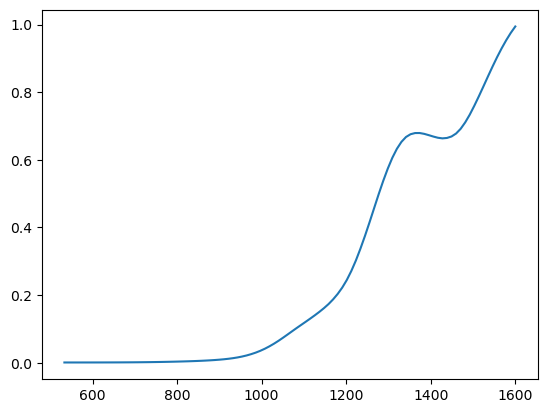

In [11]:
import matplotlib.pyplot as plt

#quantities are saved on a grid, so typically you want to interpolate

fig,ax = plt.subplots()

ax.plot(em.output_info["output_z_grids"]["x_e"], predictions["x_e"][0])

plt.show()

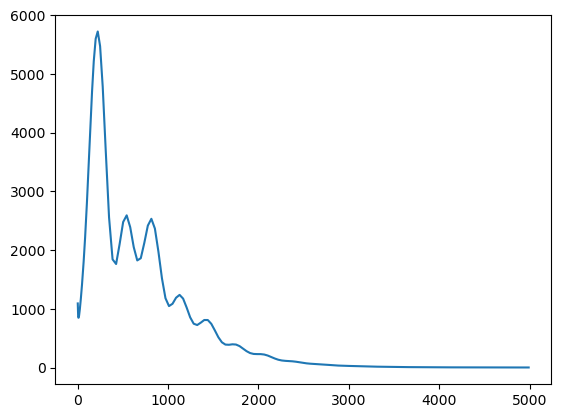

In [15]:
fig,ax = plt.subplots()

## power spectra are saved as dimensionless Dl's
## except the phi phi spectrum, which is dimensionless Cl

Tcmb = 2725500.0
muK2 = Tcmb**2 #to convert to uK 

ax.plot(em.ell, muK2*predictions["tt"][0])

plt.show()

In [20]:
# you can also get batch predictions all at one go

params = {'omega_b': [0.02253174684, 0.02239383762], 
             'omega_cdm': [0.1231127792, 0.1198190978], 
             'tau_reio': [0.05022777057, 0.05482568187],  
             'ln10^{10}A_s': [3.035621739, 3.044807319],  
             'n_s': [0.9569852914, 0.9654914081],  
             'H0': [70.66546878, 67.41947968], 
             'qt_1': [-0.0002521738332, 0.0], 
             'qt_2': [-0.0001973061583, 0.0], 
             'qt_3': [-0.006427444801, 0.0], 
             'qt_4': [-0.01520787788, 0.0], 
             'qt_5': [-0.07882834886, 0.0], 
             'qt_6': [0.01536680196, 0.0], 
             'qt_7': [-0.2335999727, 0.0],  }


#the above dictionary contains two models, the Planck+DESI modrec best fit, and the 
# LCDM best fit cosmological parameters with the standard recombination (all the qt_i variables are 0)

predictions = em.get_predictions_dict(params)

print(predictions["x_e"].shape)

(2, 100)


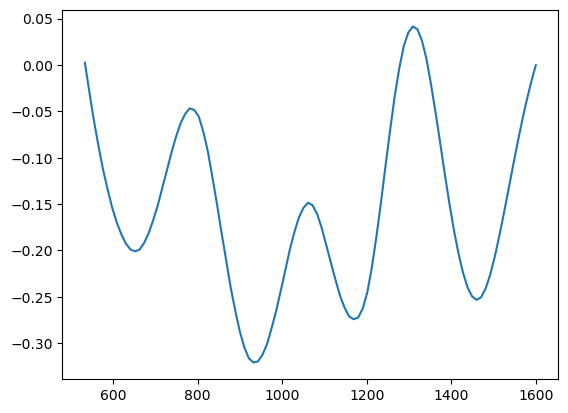

In [21]:
fig,ax = plt.subplots()

ax.plot(em.output_info["output_z_grids"]["x_e"], (predictions["x_e"][0]- predictions["x_e"][1])/predictions["x_e"][1] )